In [1]:
%matplotlib notebook
from Tafel_LPR_fit_notebook_IRcomp_IFilm import*

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score


<IPython.core.display.Javascript object>


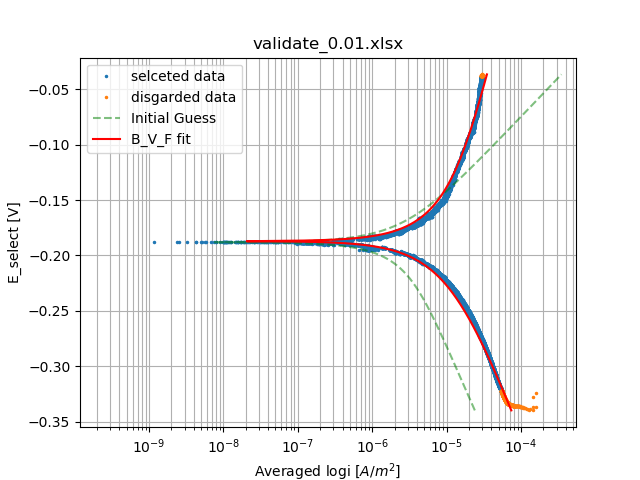

aW50ZXJhY3RpdmUoY2hpbGRyZW49KEludFJhbmdlU2xpZGVyKHZhbHVlPSg5LCAyOTg0NyksIGNvbnRpbnVvdXNfdXBkYXRlPUZhbHNlLCBkZXNjcmlwdGlvbj11J2RhdGFfcmFuZ2UnLCBsYXnigKY=


In [5]:
test = Tafit(Info('validate_0.01.xlsx',area=1))
test.BVF_LPR_interact(anodic_range=0.15,cathodic_range=0.15)

In [13]:
print 'range vs Ecorr: {:.3f}~{} V'.format(1, 1)


range vs Ecorr: 1.00~1 V


In [ ]:
Ecorr    2.193000e-02
icorr    2.796629e-07
Ba       9.028205e-02
Bc      -1.335422e-01
dtype: float64
guess [0.02193, 2.7966288549467014e-07, 0.09028205312992932, -0.133542187479349]
Unit:V, Ohm, A/m^2
B            2.338939e-02
Rp           6.694408e+04
icorr_LPR    3.493870e-07


In [ ]:
test.plot_BV_F_components()

In [ ]:
taf1 = Tafit(Info('5N12/anodic noIRcomp.xlsx',area=1))
taf1.remove_outlier(roughness=8)
#remove outlier

taf1.BVF_LPR_interact()

In [ ]:
taf1.plot_BV_F_components()

In [ ]:
plot_compare([test.info,taf1.info])
ax=plt.gca()

In [ ]:
l = plt.gca().lines[0]
l.set_marker('.')

In [ ]:
roughness=10

out_lier_idx=(taf1.data.index[0:-1][np.abs(np.diff(taf1.data['i_density']))
       > roughness *np.abs(np.mean(np.diff(taf1.data['i_density'])))])
taf1.data.iloc[taf1.data.iloc[out_lier_idx].index]=np.nan

taf1.data.dropna(inplace=True)
len(taf1.data)
taf1.data.plot(x='i_density',y='E',style='.',markersize=1)

In [ ]:
len(taf1.data)


In [ ]:
tafinfo_two = Info('validate_0.01.xlsx',area=1)
fitobj_two_step = Tafit(tafinfo_two)
fitobj_two_step.BV_LPR_interact()

In [ ]:
%matplotlib notebook
tafinfo_two = Info('validate_two_step_0.1.xlsx',area=1)
fitobj_two_step = Tafit(tafinfo_two)
fitobj_two_step.BV_LPR_interact()

In [ ]:
info_lis = [
            Info('validate_0.01.xlsx'),
            Info('validate_two_step_0.1.xlsx')    
            ]

plot_compare(info_lis,offset_drift=True,inplace=False)

In [ ]:
plot_compare(info_lis,offset_drift=False,inplace=False)

In [ ]:
taf1.data
